# Fig. 1 Observed patterns in atmospheric CO$_2$ over the Southern Ocean

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yaml

import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import cartopy.crs as ccrs

import util
import models
from models import detrend
import figure_panels
import obs_surface
import obs_aircraft

In [3]:
%%time
dsets = dict(
    fig1=dict(
        ds_obs_aircraft=xr.open_zarr(f'../sh-co2-hole-data/aircraft-sections/obs-multi-sensor-z.zarr').compute(),
        ds_obs_srf_djf=xr.open_zarr('data/plots/obs-surface-stn-v-lat-djf.zarr').compute(),
        ds_obs_srf_jja=xr.open_zarr('data/plots/obs-surface-stn-v-lat-jja.zarr').compute(),
    ),
)
dsets

CPU times: user 124 ms, sys: 15.7 ms, total: 140 ms
Wall time: 397 ms


{'fig1': {'ds_obs_aircraft': <xarray.Dataset>
  Dimensions:       (time: 9, y: 20, ye: 20, z: 22, ze: 23)
  Coordinates:
      ALT           (z, y) float64 0.25 0.25 0.25 0.25 ... 10.75 10.75 10.75 10.75
      LAT           (z, y) float64 -78.75 -76.25 -73.75 ... -36.25 -33.75 -31.25
      campaigns     (time) <U7 'HIPPO-1' 'HIPPO-2' 'HIPPO-3' ... 'ATOM-3' 'ATOM-4'
      month         (time) int64 1 11 4 8 2 8 2 10 5
    * time          (time) datetime64[ns] 2009-01-20 2009-11-11 ... 2018-05-07
    * y             (y) float64 -78.75 -76.25 -73.75 ... -36.25 -33.75 -31.25
    * ye            (ye) float64 -80.0 -77.5 -75.0 -72.5 ... -37.5 -35.0 -32.5
      year          (time) int64 2009 2009 2010 2011 2016 2016 2017 2017 2018
    * z             (z) float64 0.25 0.75 1.25 1.75 2.25 ... 9.25 9.75 10.25 10.75
    * ze            (ze) float64 0.0 0.5 1.0 1.5 2.0 ... 9.0 9.5 10.0 10.5 11.0
  Data variables:
      CO2_binned    (time, z, y) float64 nan nan nan nan ... 405.9 405.8 405.5
     

CPU times: user 2.32 s, sys: 962 ms, total: 3.29 s
Wall time: 3.29 s


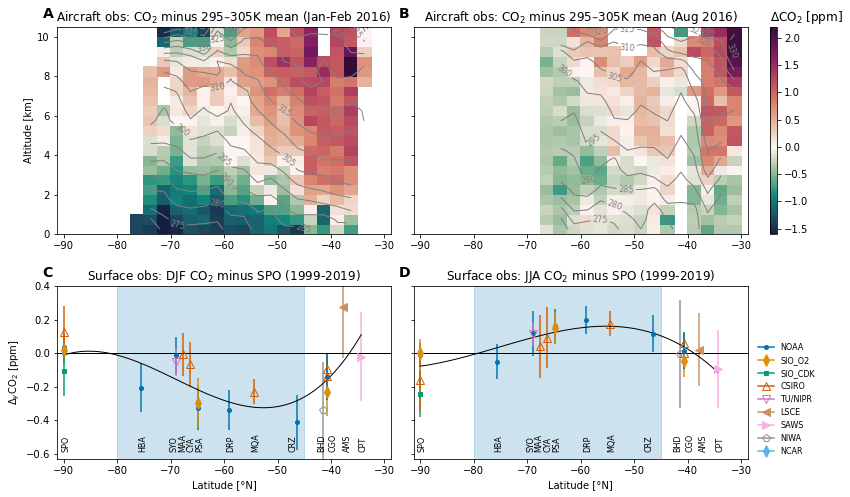

In [13]:
%%time
# set up canvas
fig = plt.figure(figsize=(10, 6)) #dpi=300)

# set up plot grid
gs_top = gridspec.GridSpec(nrows=1, ncols=3, 
                        width_ratios=(1, 1, 0.02), 
                        left=0, right=1, bottom=0.52, top=1.,
                        hspace=0.2, wspace=0.1,
                       )

gs_bot = gridspec.GridSpec(nrows=1, ncols=3, 
                        width_ratios=(1, 1, 0.02), 
                        left=0, right=1, bottom=0, top=0.4,
                        hspace=0.2, wspace=0.1,
                       )

axs = dict(
    section_DJF=plt.subplot(gs_top[0, 0]),
    section_JJA=plt.subplot(gs_top[0, 1]),
    surface_DJF=plt.subplot(gs_bot[0, 0]),
    surface_JJA=plt.subplot(gs_bot[0, 1]),        
)
caxs = dict(
    section=plt.subplot(gs_top[:, -1]),
)

#------------------------------------
#--- ORCAS Section
#------------------------------------

ds = dsets['fig1']['ds_obs_aircraft']
ax = axs['section_DJF']

ndx = np.where(ds.campaigns == 'ORCAS')[0][0]
cf = ax.pcolormesh(
        ds.y, ds.z, ds.DCO2_binned.isel(time=ndx).squeeze(),
        norm=figure_panels.divnorm,
        cmap=figure_panels.cmap,
        shading='nearest',    
    )
cs = ax.contour(
    ds.LAT, ds.ALT, ds.THETA.isel(time=ndx).squeeze(),
    levels=np.arange(255., 350., 5.),
    linewidths=1,
    colors='gray')    
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%d')  

ax.set_title('Aircraft obs: CO$_2$ minus 295–305K mean (Jan-Feb 2016)')
ax.set_ylim((0, 10.5))
ax.set_xlim(-91.25, -28.75)
ax.set_ylabel('Altitude [km]')        


#------------------------------------
#--- ATom Section
#------------------------------------

ds = dsets['fig1']['ds_obs_aircraft']
ax = axs['section_JJA']

ndx = np.where(ds.campaigns == 'ATOM-1')[0][0]
cf = ax.pcolormesh(
        ds.y, ds.z, ds.DCO2_binned.isel(time=ndx).squeeze(),
        norm=figure_panels.divnorm,
        cmap=figure_panels.cmap,
        shading='nearest',
    )
cs = ax.contour(
    ds.LAT, ds.ALT, ds.THETA.isel(time=ndx).squeeze(),
    levels=np.arange(255., 350., 5.),
    linewidths=1,
    colors='gray')    
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%d') 

ax.set_title('Aircraft obs: CO$_2$ minus 295–305K mean (Aug 2016)')
ax.set_ylim((0, 10.5))
ax.set_xlim(-91.25, -28.75)
ax.set_yticklabels([])

cax = caxs['section']
plt.colorbar(cf, cax=cax)
cax.set_title('$\Delta$CO$_2$ [ppm]', loc='left')

#------------------------------------
#--- DJF Surface
#------------------------------------

ds = dsets['fig1']['ds_obs_srf_djf']
ax = axs[f'surface_DJF']
figure_panels.stn_v_lat(ds.CO2, ax)   
ax.set_ylabel('')
ax.set_title(f'Surface obs: DJF CO$_2$ minus SPO (1999-2019)')
ax.set_xlim(-91.25, -28.75)
ax.set_ylabel('$\Delta_{ y}$CO$_2$ [ppm]')

#------------------------------------
#--- JJA Surface
#------------------------------------

ds = dsets['fig1']['ds_obs_srf_jja']
ax = axs[f'surface_JJA']
figure_panels.stn_v_lat(ds.CO2, ax)   
ax.set_ylabel('')
ax.set_title(f'Surface obs: JJA CO$_2$ minus SPO (1999-2019)')
ax.set_xlim(-91.25, -28.75)
ax.set_yticklabels([])


marker_spec = figure_panels.marker_spec_co2_inst()
legend_elements = [Line2D([0], [0], label=inst, linestyle=None, **spec) 
                   for inst, spec in marker_spec.items() if inst != 'Multiple']
ax.legend(handles=legend_elements, ncol=1, 
          fontsize=8, loc=(1.02, 0), frameon=False);

plot_keys = [
    'section_DJF', 'section_JJA', 
    'surface_DJF', 'surface_JJA', 
]   
util.label_plots(fig, [axs[k] for k in plot_keys], xoff=-0.02, yoff=0.02)

util.savefig(f'figure-1-co2-aircraft-surface-obs.pdf')